# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.dpi"] = 300

In [3]:
df = pd.read_csv("data/track_features.csv.gz")
df.shape

(1204025, 25)

In [4]:
# add some columns for interpretability
df["artists"] = df["artists"].str.slice(1, -1).str.split(",")
df["num_artists"] = df["artists"].str.len()
df["primary_artist"] = df["artists"].str[0]
df["explicit"] = df["explicit"].astype(int)

# drop first duplicate index col
df = df.iloc[:, 1:]
df = df[df["year"] != 0]

In [5]:
df.head()

id                   name                      album  \
0  7lmeHLHBe4nmXzuXc0HDjk                Testify  The Battle Of Los Angeles   
1  1wsRitfRRtWyEapl0q22o8        Guerrilla Radio  The Battle Of Los Angeles   
2  1hR0fIFK2qRG3f3RF70pb7       Calm Like a Bomb  The Battle Of Los Angeles   
3  2lbASgTSoDO7MTuLAXlTW0              Mic Check  The Battle Of Los Angeles   
4  1MQTmpYOZ6fcMQc56Hdo7T  Sleep Now In the Fire  The Battle Of Los Angeles   

                 album_id                       artists  \
0  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
1  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
2  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
3  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   
4  2eia0myWFgoHuttJytCxgX  ['Rage Against The Machine']   

                   artist_ids  track_number  disc_number  explicit  \
0  ['2d0hyoQ5ynDBnkvAbJKORj']             1            1         0   
1  ['2d0hyoQ5ynDBnkvAbJKORj']             2            1         1   
2  ['2d0hyoQ5ynDBnkvAbJKORj']             3            1         0   
3  ['2d0hyoQ5ynDBnkvAbJKORj']             4            1         1   
4  ['2d0hyoQ5ynDBnkvAbJKORj']             5            1         0   

   danceability  ...  instrumentalness  liveness  valence    tempo  \
0         0.470  ...          0.000011    0.3560    0.503  117.906   
1         0.599  ...          0.000071    0.1550    0.489  103.680   
2         0.315  ...          0.000002    0.1220    0.370  149.749   
3         0.440  ...          0.000004    0.1210    0.574   96.752   
4         0.426  ...          0.105000    0.0789    0.539  127.059   

   duration_ms  time_signature  year  release_date  num_artists  \
0       210133             4.0  1999    1999-11-02            1   
1       206200             4.0  1999    1999-11-02            1   
2       298893             4.0  1999    1999-11-02            1   
3       213640             4.0  1999    1999-11-02            1   
4       205600             4.0  1999    1999-11-02            1   

               primary_artist  
0  'Rage Against The Machine'  
1  'Rage Against The Machine'  
2  'Rage Against The Machine'  
3  'Rage Against The Machine'  
4  'Rage Against The Machine'  

[5 rows x 26 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1204015 entries, 0 to 1204024
Data columns (total 26 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204015 non-null  object 
 1   name              1204015 non-null  object 
 2   album             1204015 non-null  object 
 3   album_id          1204015 non-null  object 
 4   artists           1204015 non-null  object 
 5   artist_ids        1204015 non-null  object 
 6   track_number      1204015 non-null  int64  
 7   disc_number       1204015 non-null  int64  
 8   explicit          1204015 non-null  int64  
 9   danceability      1204015 non-null  float64
 10  energy            1204015 non-null  float64
 11  key               1204015 non-null  int64  
 12  loudness          1204015 non-null  float64
 13  mode              1204015 non-null  int64  
 14  speechiness       1204015 non-null  float64
 15  acousticness      1204015 non-null  float64
 16  

In [7]:
df.shape

(1204015, 26)

In [8]:
df.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date', 'num_artists',
       'primary_artist'],
      dtype='object')

categorical variables
- artists / artist_ids
- primary_artist
- num_artists
- explicit
- key
- mode
- time_signature
- year
- track_number
- disc_number

continuous variables
- danceability
- energy
- loudness
- speechiness
- instrumentalness
- liveness
- valence
- tempo
- duration_ms

In [9]:
artists = df["primary_artist"].unique()
print("number of artists:", len(artists))

number of artists: 83751


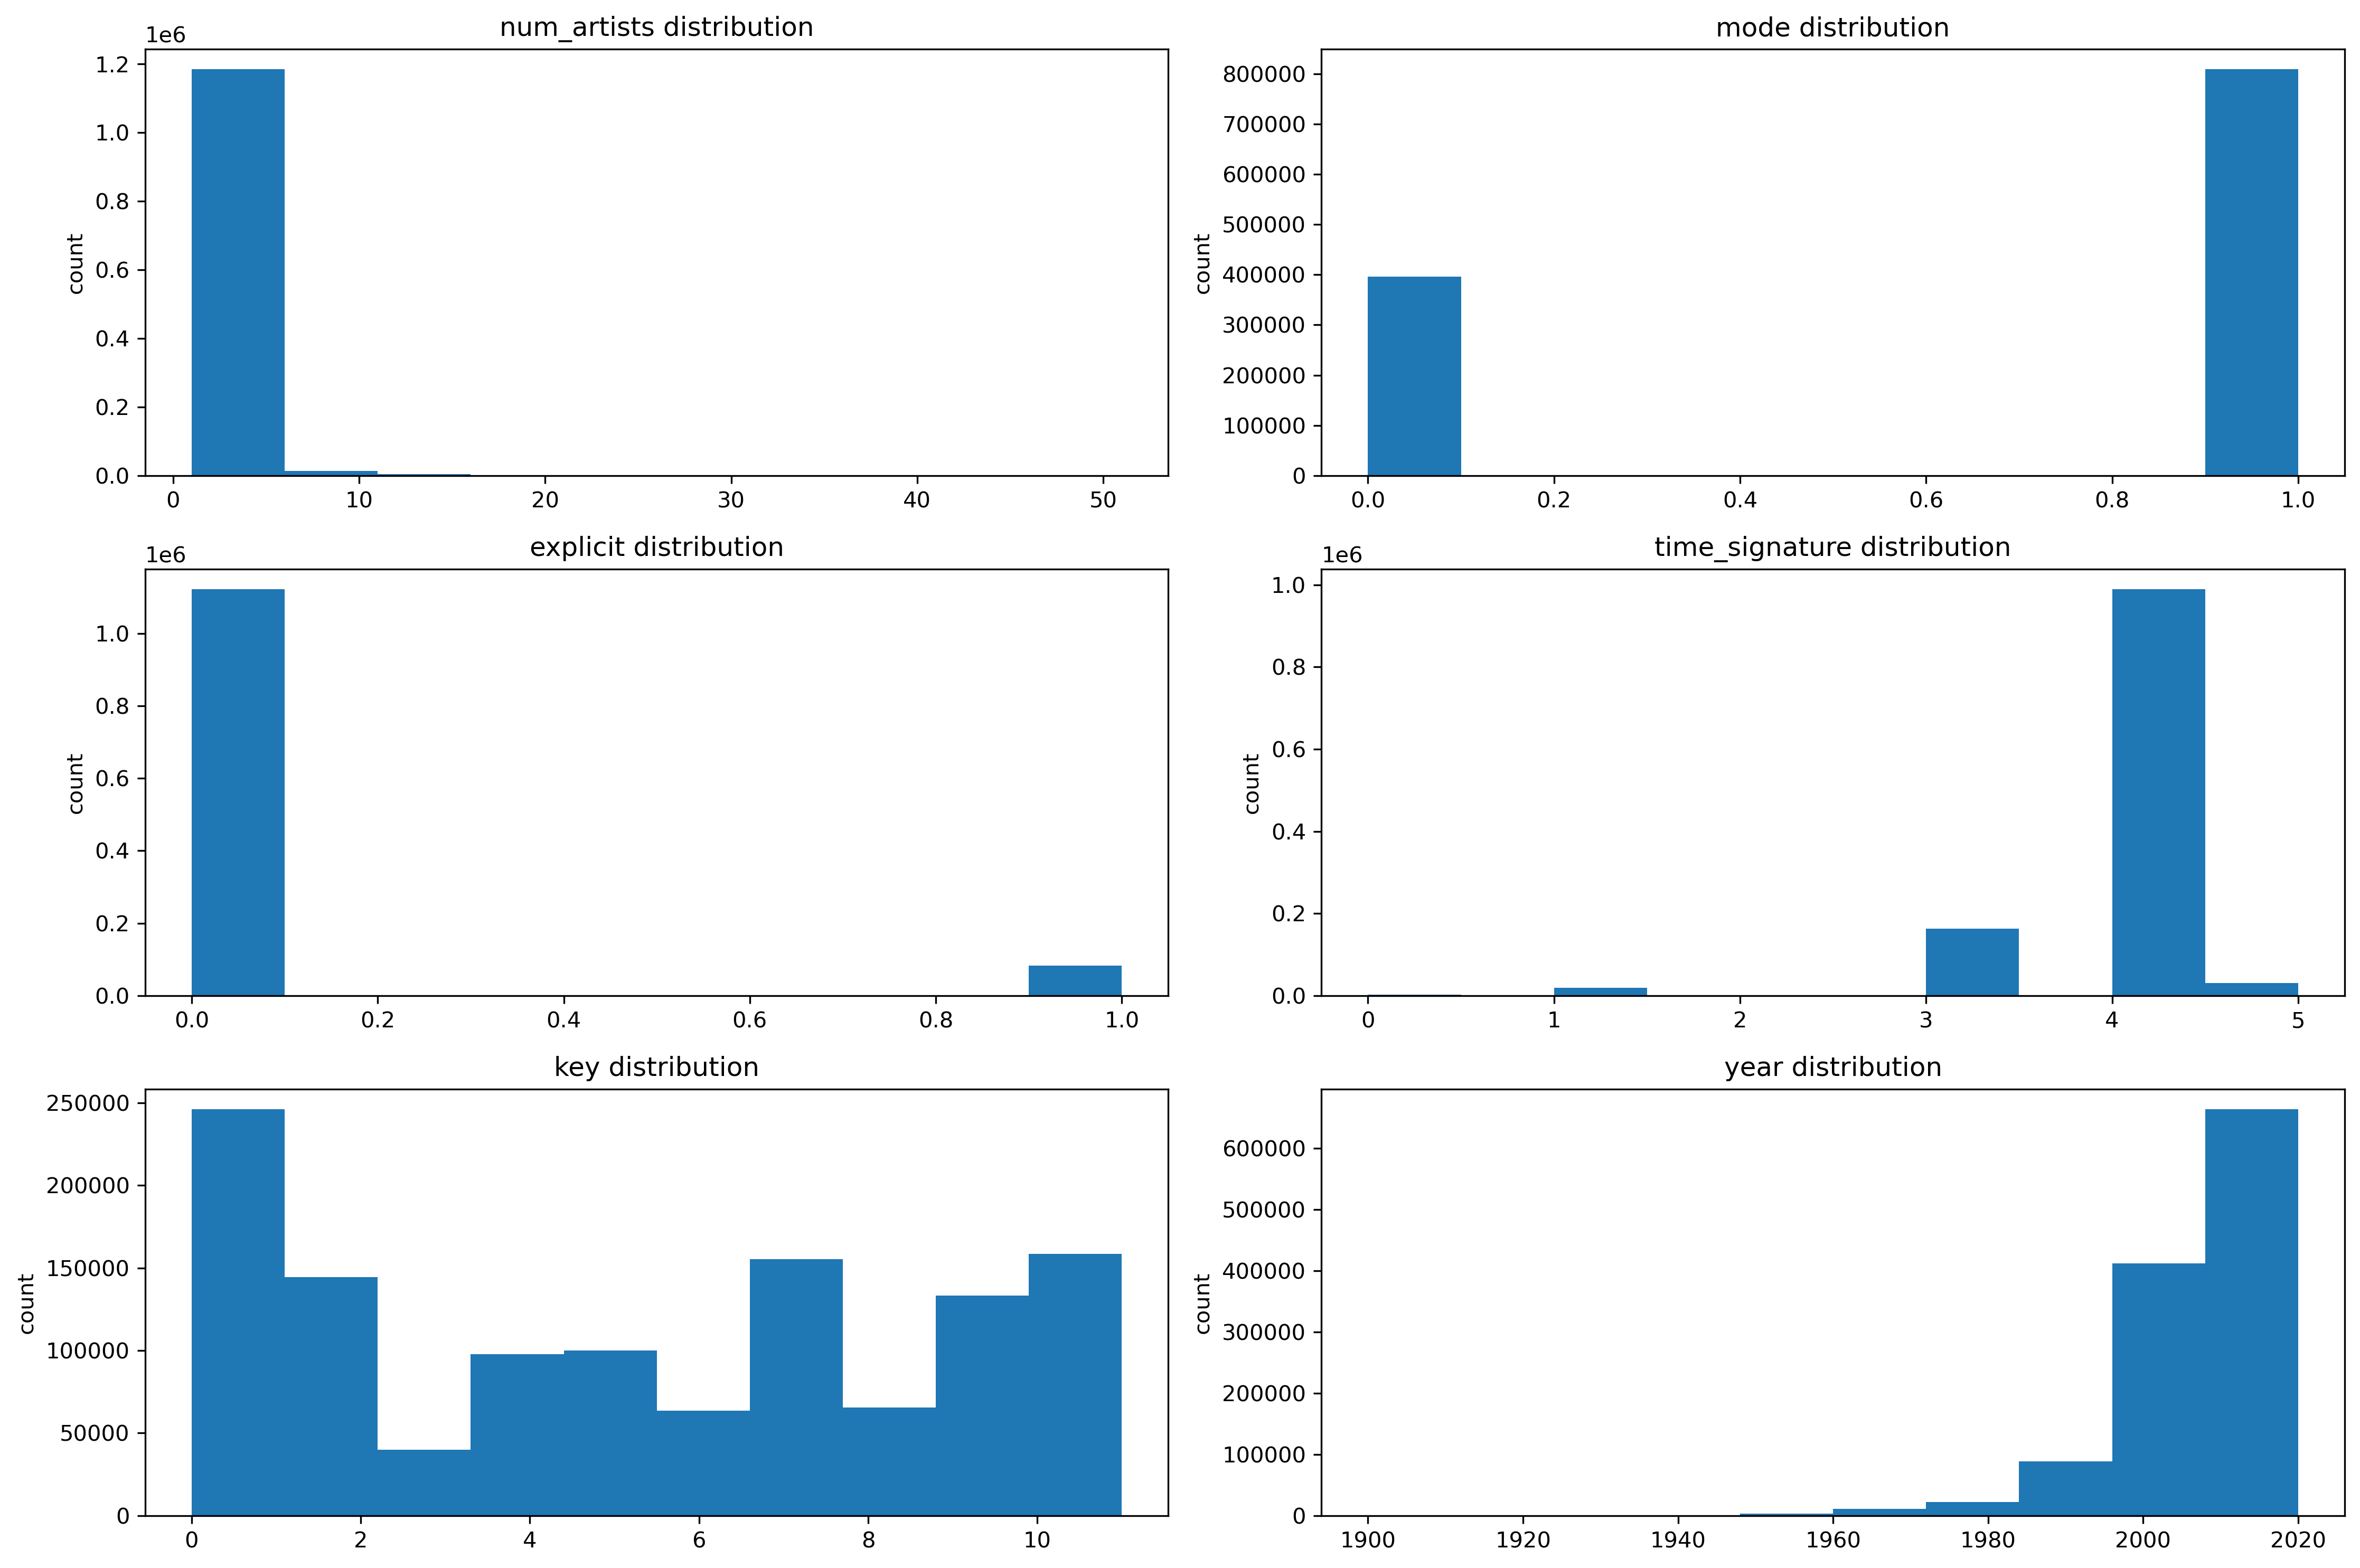

In [10]:
categorical_cols = ["num_artists", "explicit", "key", "mode", "time_signature", "year"]

fig, ax = plt.subplots(3, 2, figsize=(15, 10))

for i in range(len(categorical_cols)):
    ax[i % 3, i // 3].hist(df[categorical_cols[i]])
    ax[i % 3, i // 3].title.set_text(categorical_cols[i] + " distribution")
    ax[i % 3, i // 3].set_ylabel("count")

fig.tight_layout()
plt.show()

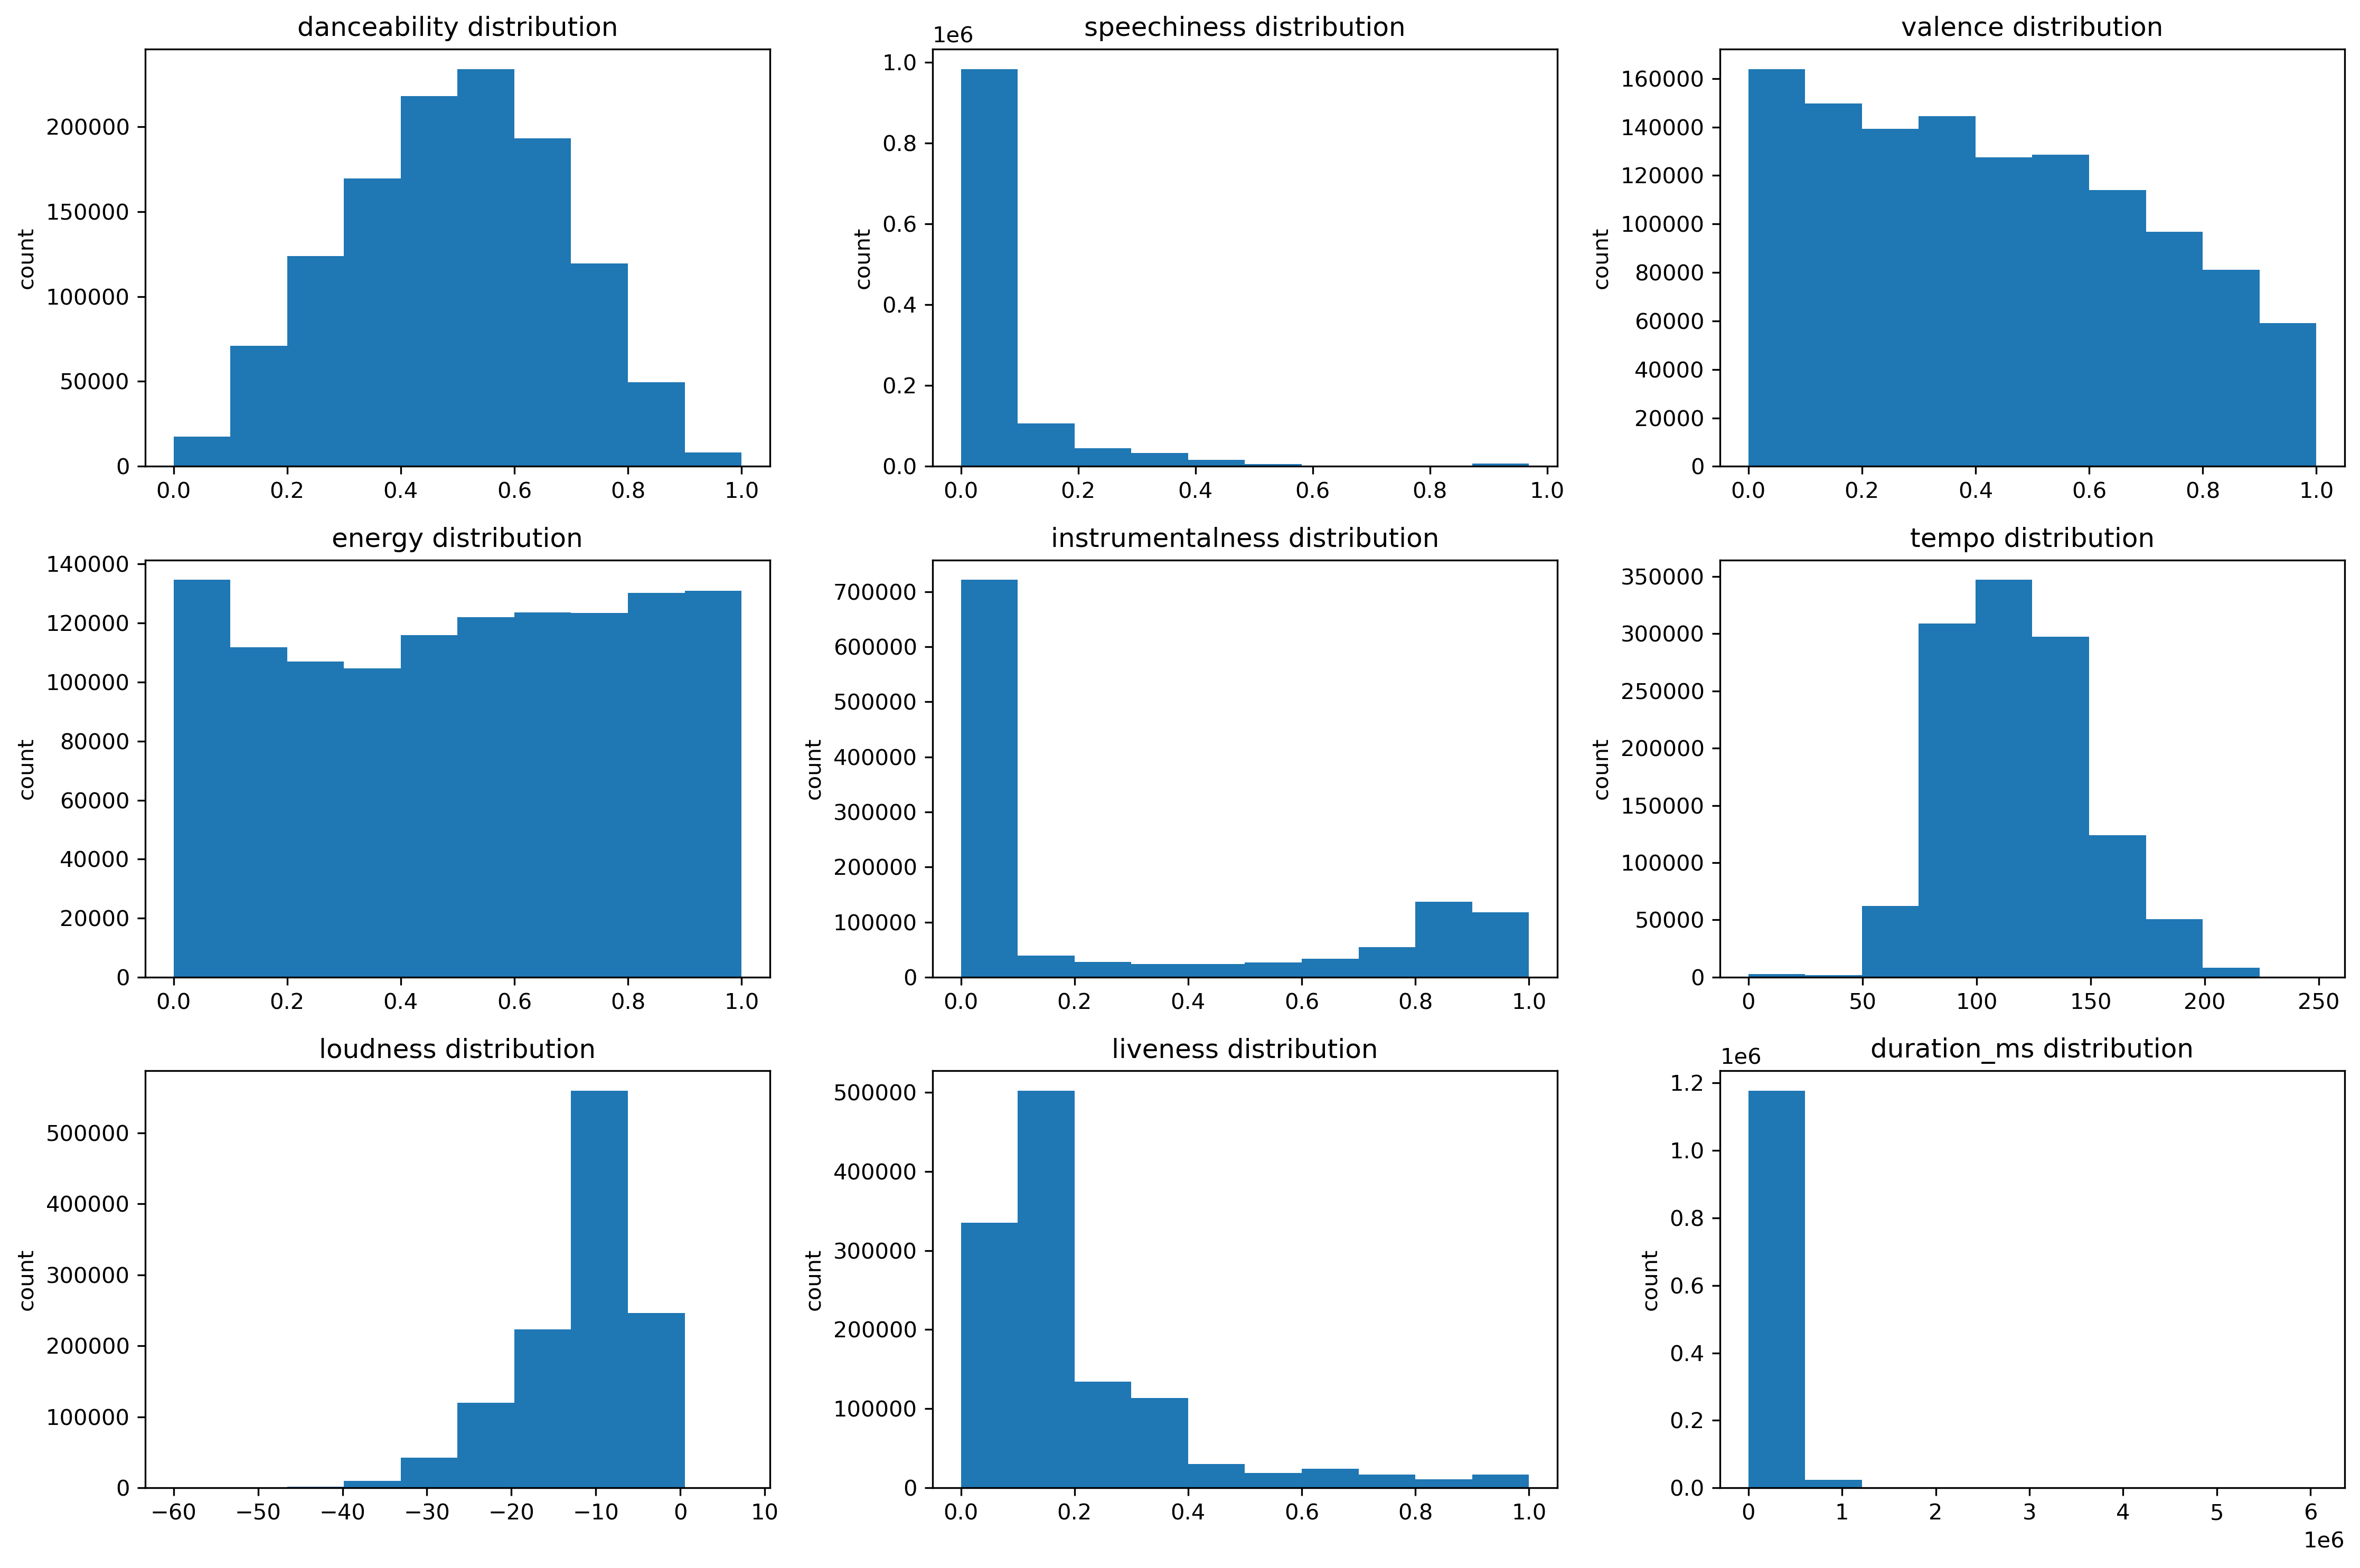

In [11]:
continuous_cols = ["danceability", "energy", "loudness", "speechiness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]

fig, ax = plt.subplots(3, 3, figsize=(15, 10))

for i in range(len(continuous_cols)):
    ax[i % 3, i // 3].hist(df[continuous_cols[i]])
    ax[i % 3, i // 3].title.set_text(continuous_cols[i] + " distribution")
    ax[i % 3, i // 3].set_ylabel("count")

fig.tight_layout()
plt.show()

<AxesSubplot:>

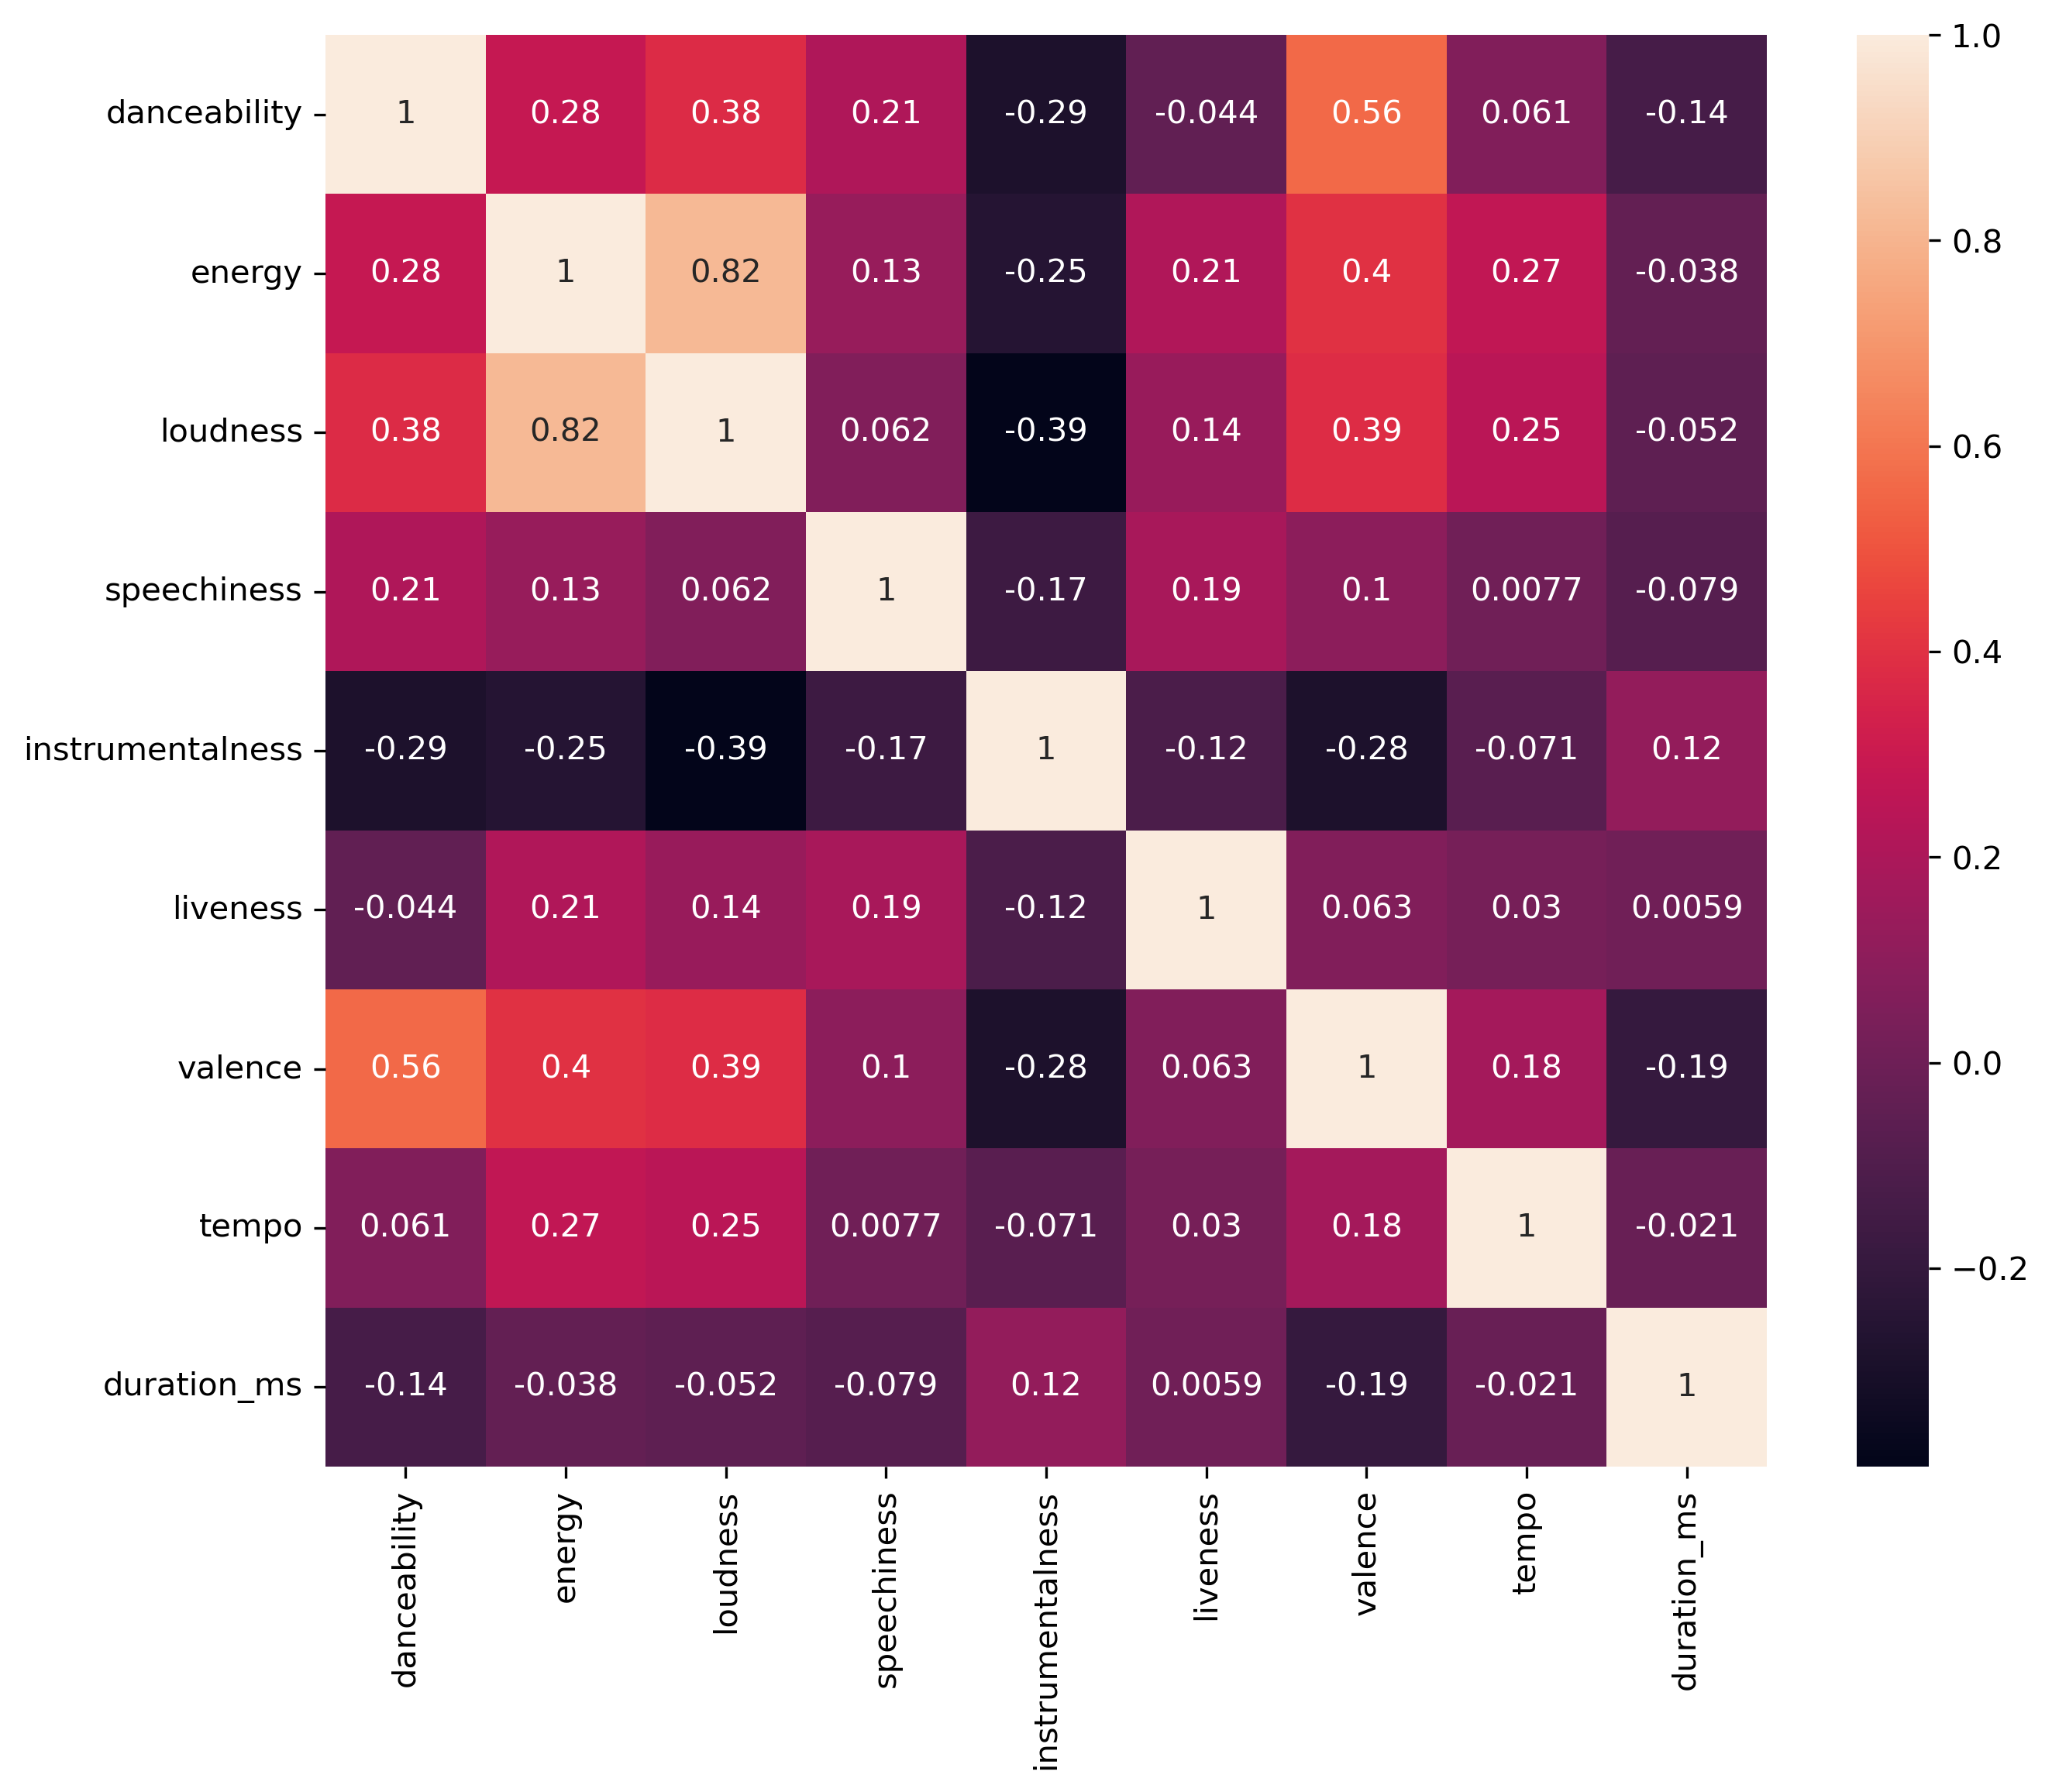

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.loc[:, continuous_cols].corr(), annot=True)

In [13]:
df[df["artists"].str.len() == 2]

id  \
489      4FnZjiy1T8BLu05ya2A9q0   
490      4rUJvsznlg30n1RkCdJl8P   
608      1k7TGEMNVQm4bPbzuAgc7g   
678      09VJNMsNrWmf8ocIY7M3uf   
679      4OCQW7Mzkyv8euwzJRPPDm   
...                         ...   
1203968  2XIc1pqjXV3Cr2BQUGNBck   
1203974  4MzXwWMhyBbmu6hOcLVD49   
1203976  5jZ32WOU7sqzDYbzINwMUk   
1203982  5sMt9VtgtuakJOUSvVMzhG   
1204018  4GMAChvptmrvOS0pnP7oay   

                                                      name  \
489                          Disillusion - Blue States Mix   
490                          Disillusion - Black Lodge Mix   
608                                       Don't You Think?   
678      Piano Sonata No. 2 in B-Flat Minor, Op. 35 "Fu...   
679      Piano Sonata No. 2 in B-Flat Minor, Op. 35 "Fu...   
...                                                    ...   
1203968                                 LA NOCHE DE ANOCHE   
1203974                                             DÁKITI   
1203976                                         SORRY PAPI   
1203982                                             Hitman   
1204018       Cold - DeeTown Remix featuring Miss Eighty 6   

                                                album                album_id  \
489                                       Disillusion  28GxeRP74uhZxTewnIZuyd   
490                                       Disillusion  28GxeRP74uhZxTewnIZuyd   
608                                Left Of The Middle  38alWeQVP9UUAGJvLptys9   
678                           Favorite Chopin, Vol. 2  11jmdPmZgx4GLPLRdqqxuE   
679                           Favorite Chopin, Vol. 2  11jmdPmZgx4GLPLRdqqxuE   
...                                               ...                     ...   
1203968                      EL ÚLTIMO TOUR DEL MUNDO  2d9BCZeAAhiZWPpbX9aPCW   
1203974                      EL ÚLTIMO TOUR DEL MUNDO  2d9BCZeAAhiZWPpbX9aPCW   
1203976                      EL ÚLTIMO TOUR DEL MUNDO  2d9BCZeAAhiZWPpbX9aPCW   
1203982                                        Hitman  241KpFxFLg6NjeVLieKuah   
1204018  Cold (DeeTown Remix featuring Miss Eighty 6)  4mpGPCYjrzAeRWC6r08C2n   

                                                   artists  \
489                    ['Badly Drawn Boy',  'Blue States']   
490                    ['Badly Drawn Boy',  'Black Lodge']   
608                   ['Natalie Imbruglia',  'Mark Plati']   
678              ['Frédéric Chopin',  'Vladimir Horowitz']   
679              ['Frédéric Chopin',  'Vladimir Horowitz']   
...                                                    ...   
1203968                          ['Bad Bunny',  'ROSALÍA']   
1203974                      ['Bad Bunny',  'Jhay Cortez']   
1203976                             ['Bad Bunny',  'ABRA']   
1203982                          ['Kelly Rowland',  'NFL']   
1204018  ['Crossfade',  'Ali \x93Dee\x94 Theodore for D...   

                                                artist_ids  track_number  \
489      ['244fcyNSuyhbRlMGfMbYrO', '2wlTl7AyP0icYtAsmP...             2   
490      ['244fcyNSuyhbRlMGfMbYrO', '0BDXVCqEZvEduDm8Z4...             3   
608      ['0dlOr0VIysztGWvU1dpjmP', '6ZspT3xZPjYVscQkAI...             8   
678      ['7y97mc3bZRFXzT2szRM4L4', '4Ws5hSoABAwvGJ4LhH...             1   
679      ['7y97mc3bZRFXzT2szRM4L4', '4Ws5hSoABAwvGJ4LhH...             2   
...                                                    ...           ...   
1203968  ['4q3ewBCX7sLwd24euuV69X', '7ltDVBr6mKbRvohxhe...             5   
1203974  ['4q3ewBCX7sLwd24euuV69X', '0EFisYRi20PTADoJri...            11   
1203976  ['4q3ewBCX7sLwd24euuV69X', '3ZJxEmjYZd5VOqZ8o3...            13   
1203982  ['3AuMNF8rQAKOzjYppFNAoB', '1oj9F8x44ah5gxYecE...             1   
1204018  ['4IR8ZkpbyyKrqsIzchF3NB', '6fUcX0Rh7Z17l8jAFQ...             1   

         disc_number  explicit  danceability  ...  instrumentalness  liveness  \
489                1         0         0.574  ...          0.000475    0.0971   
490                1         0         0.186  ...          0.962000   

(array([8.3717e+04, 2.2000e+01, 7.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 9.4820e+02, 1.8954e+03, 2.8426e+03, 3.7898e+03,
        4.7370e+03, 5.6842e+03, 6.6314e+03, 7.5786e+03, 8.5258e+03,
        9.4730e+03]),
 <BarContainer object of 10 artists>)

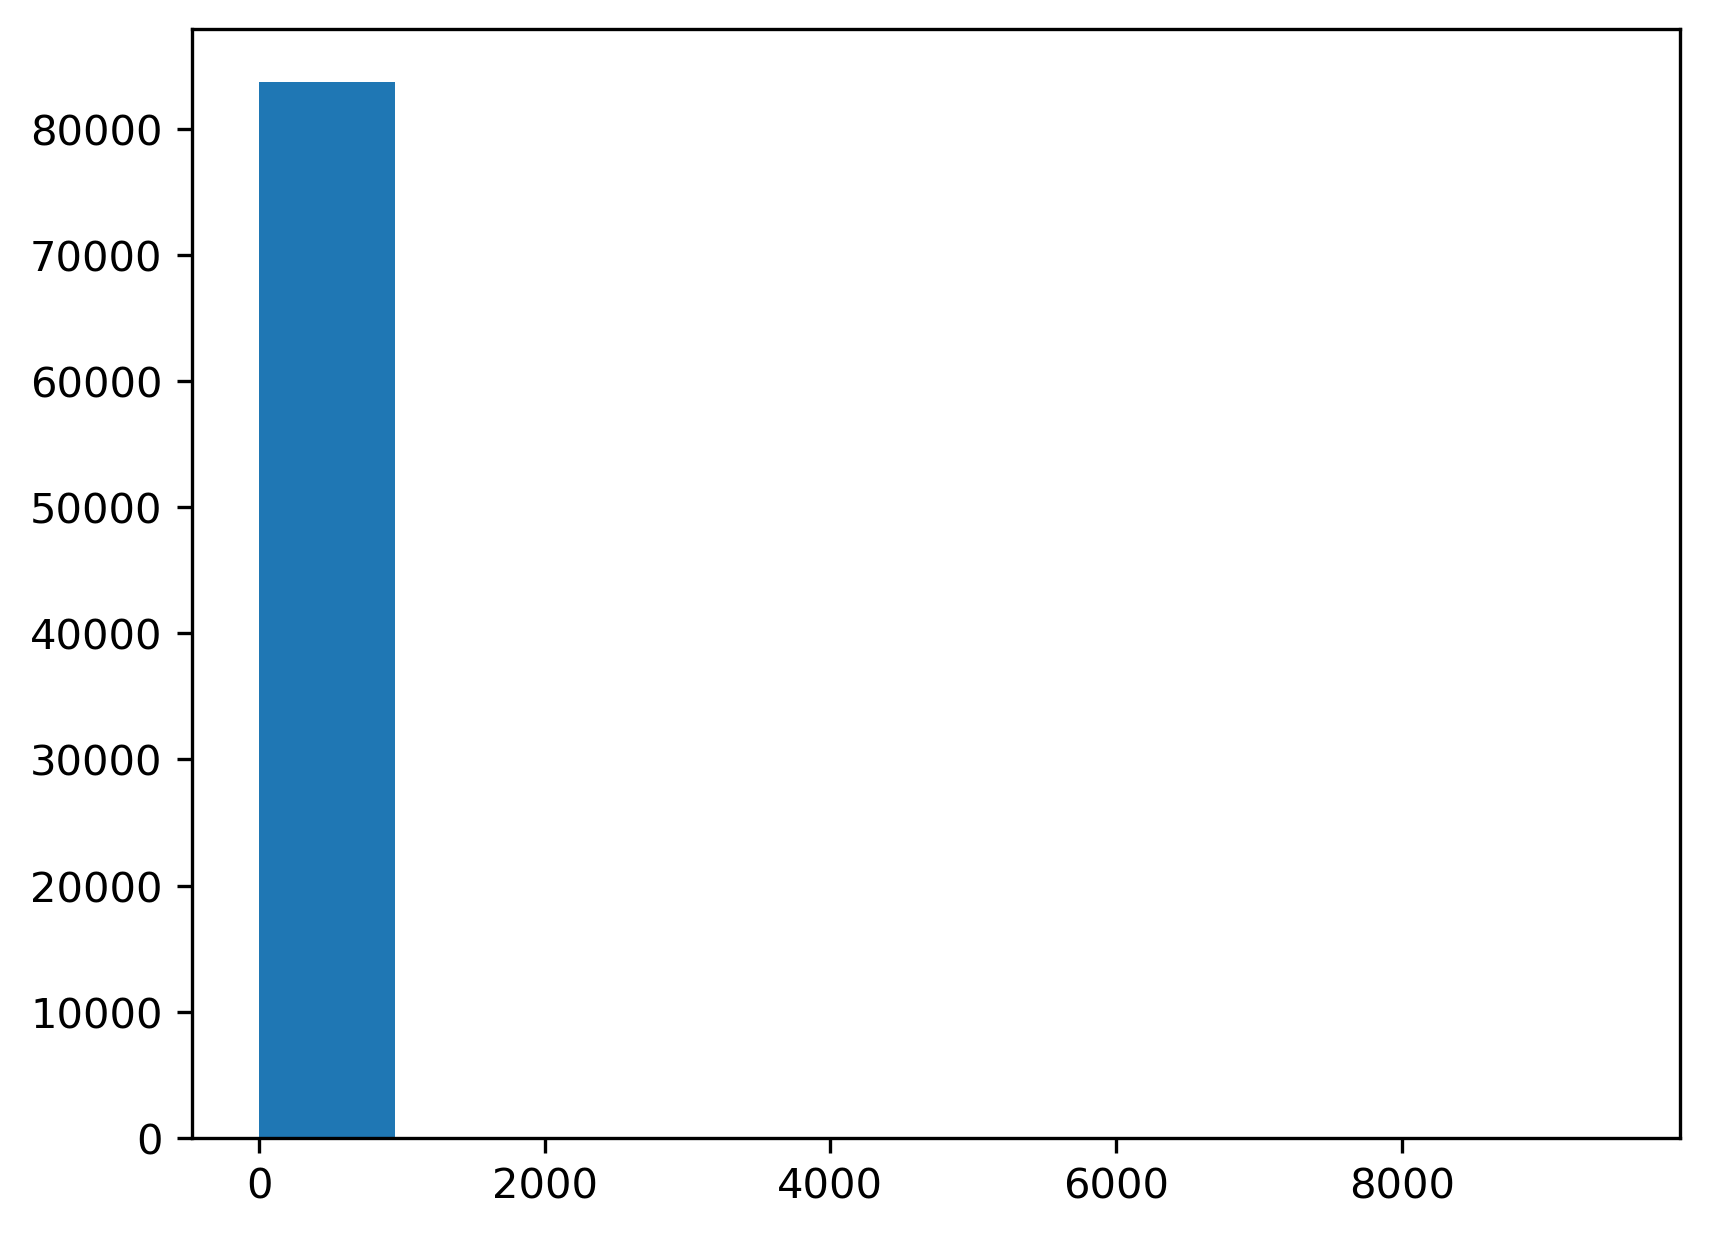

In [14]:
plt.hist(df["primary_artist"].value_counts())

In [15]:
counts = df.groupby("primary_artist").count().sort_values("id", ascending=False)["id"]
counts

primary_artist
'Johann Sebastian Bach'      9473
'Ludwig van Beethoven'       5710
'Wolfgang Amadeus Mozart'    3768
'George Frideric Handel'     3008
'Antonio Vivaldi'            2851
                             ... 
'P.J.N.'                        1
'P.J. Olsson'                   1
'P.I.M.P.'                      1
'DJ Gee'                        1
'Playa Fly'                     1
Name: id, Length: 83751, dtype: int64

<AxesSubplot:>

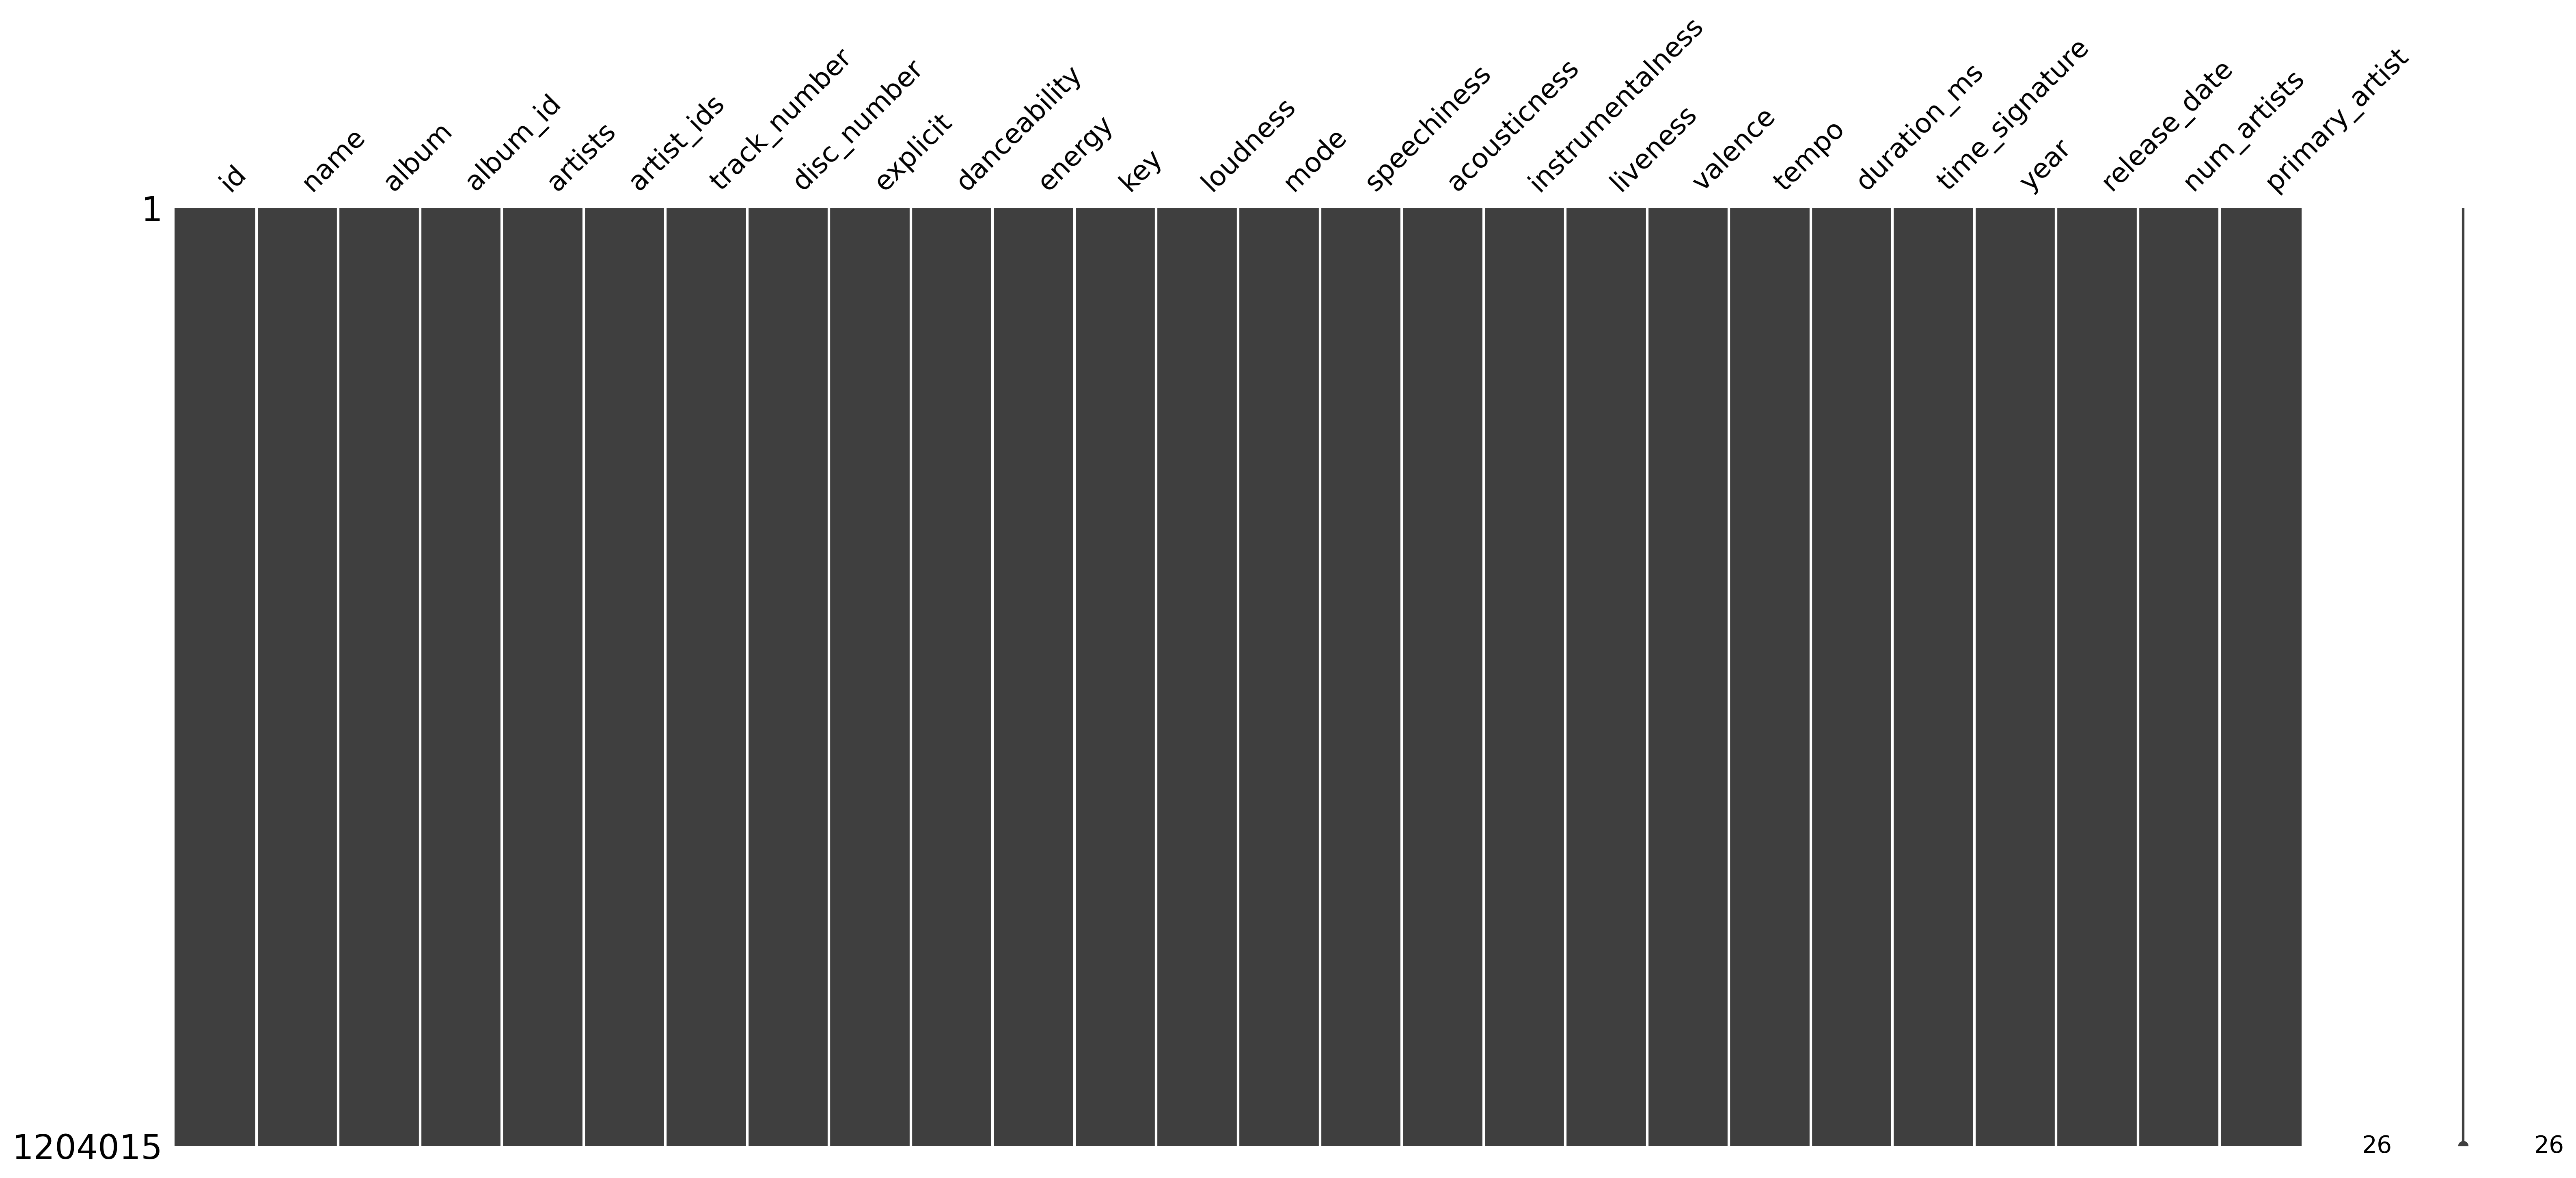

In [17]:
import missingno as msno
msno.matrix(df)

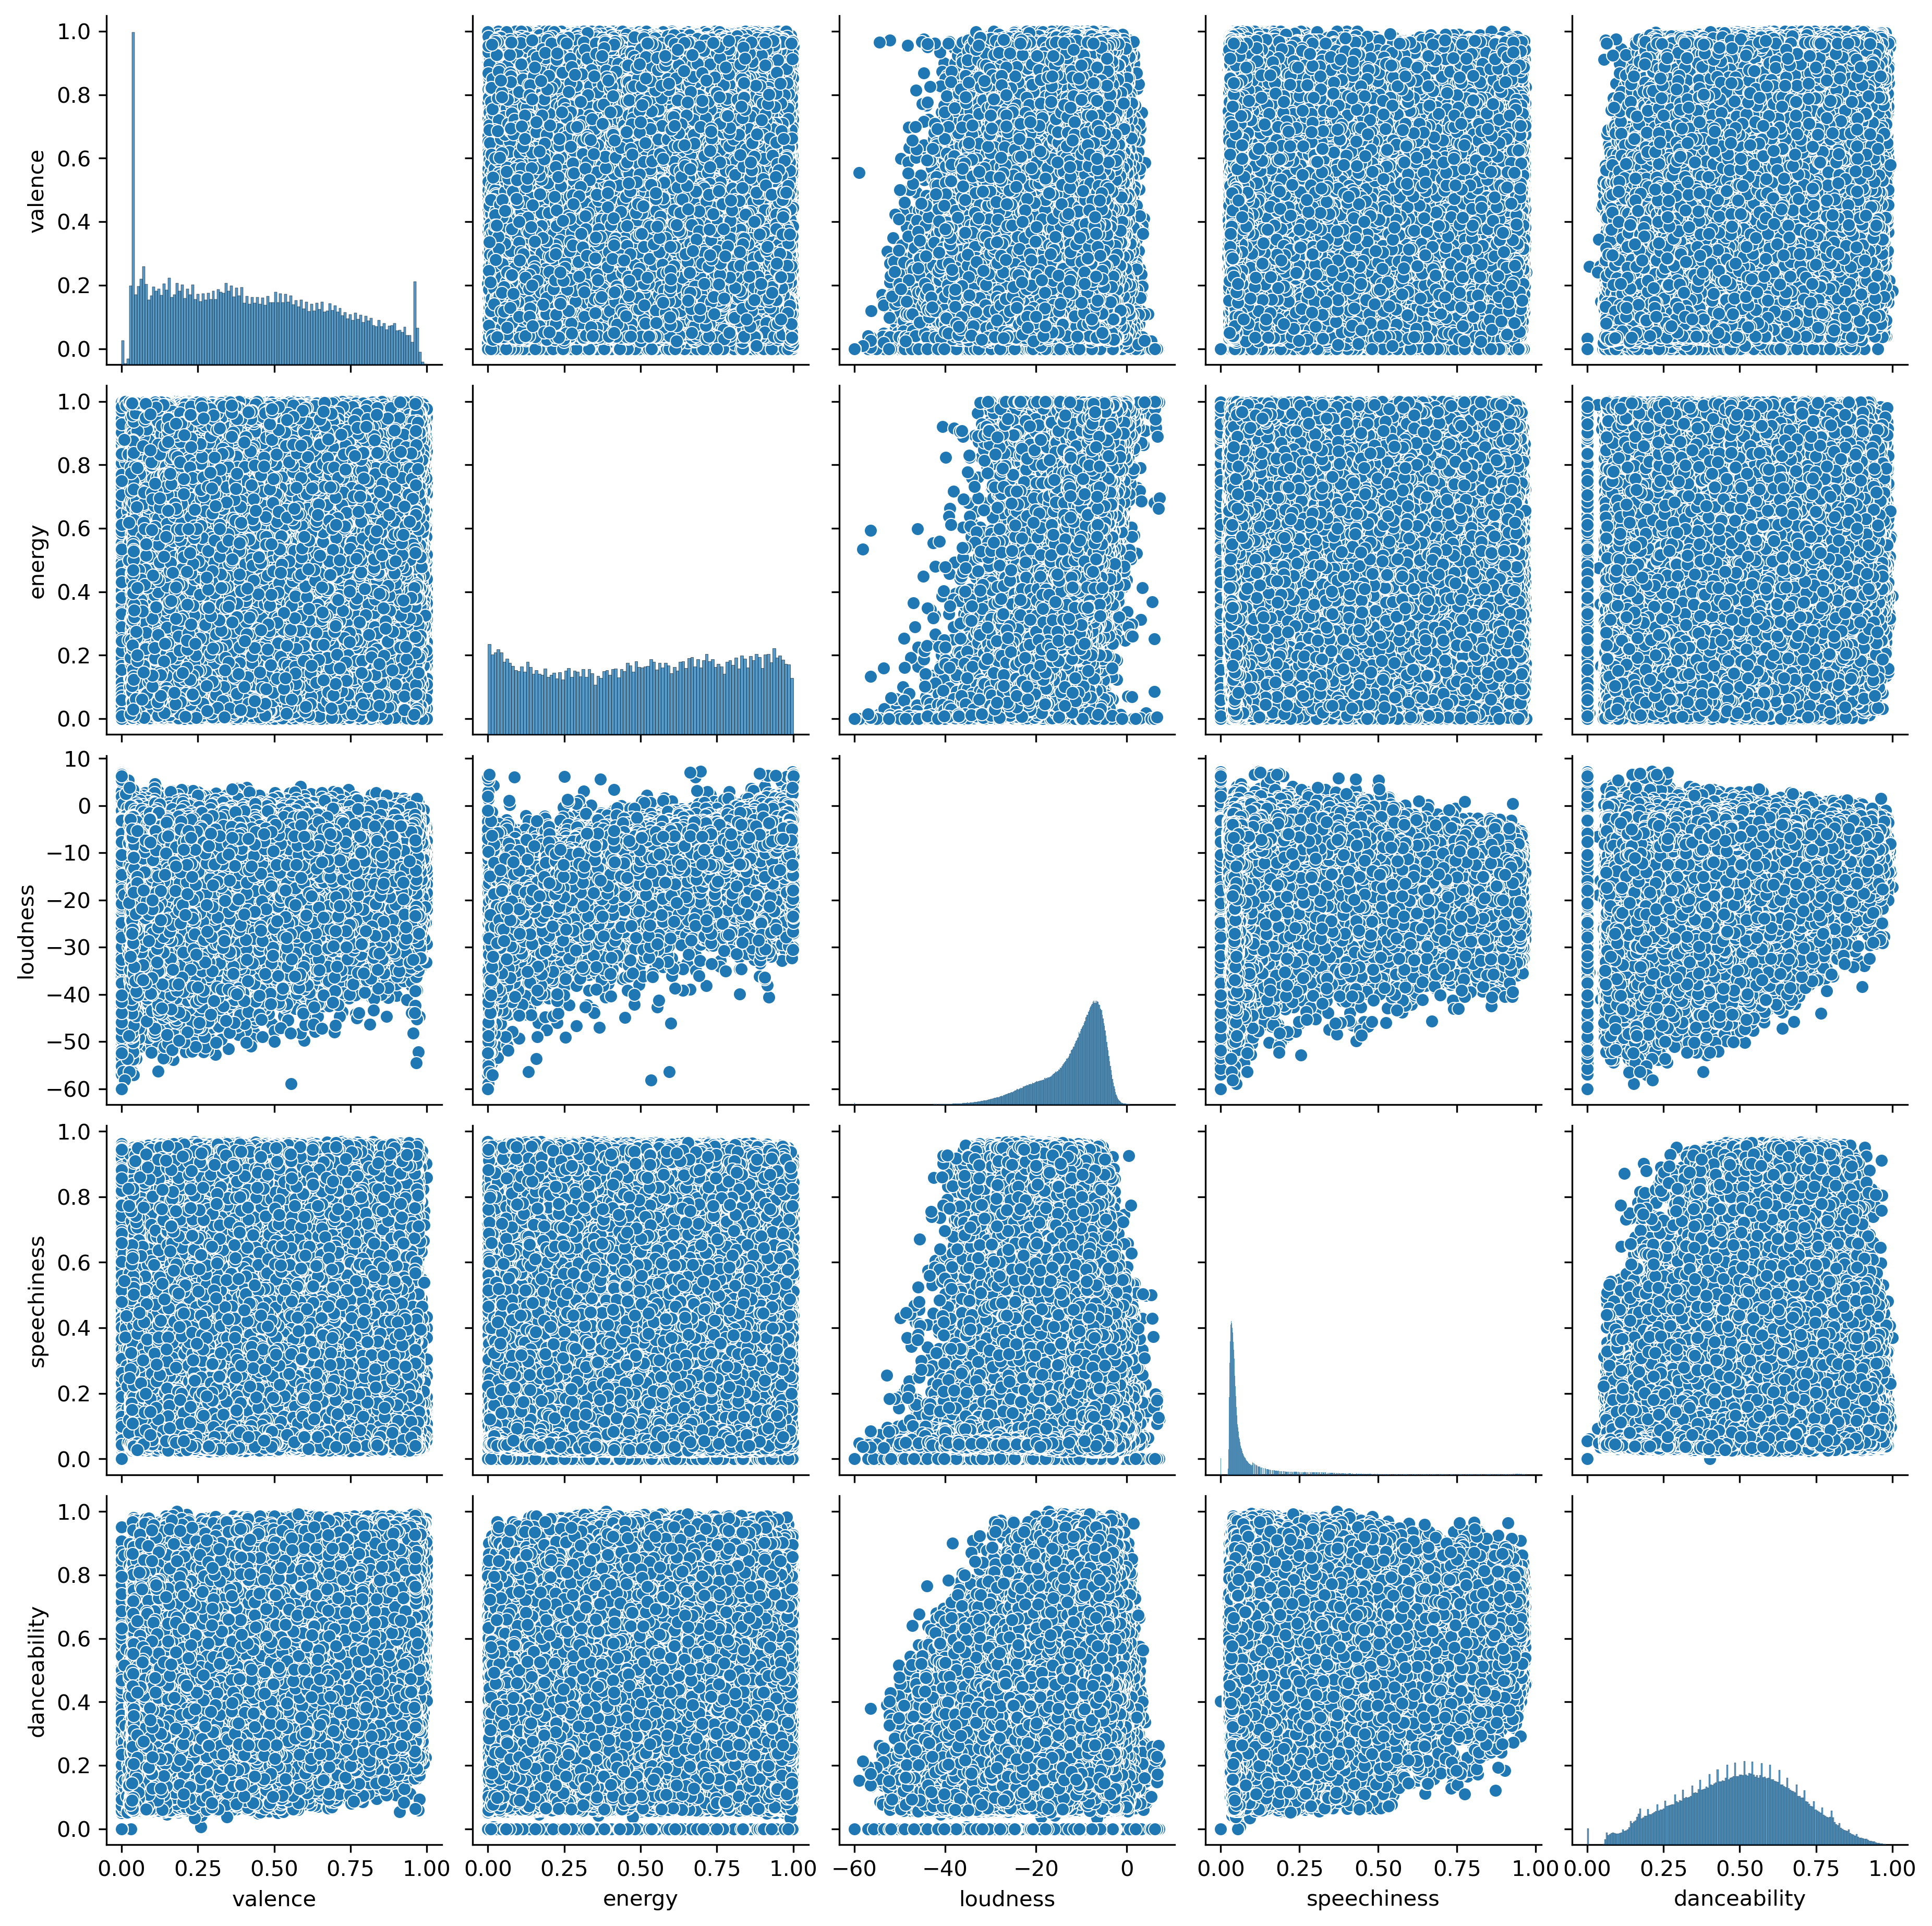

In [20]:
sns.pairplot(df, vars = ['valence','energy','loudness','speechiness','danceability'])